# Introduction

##### The goal of this project is to analyze biodiversity data from the National Parks Service, focusing on various species observed in different national park locations. This project aims to scope, analyze, prepare, and plot data to explain the findings from the analysis.

##### Here are a few key questions this project seeks to answer:

* What is the distribution of conservation status for different species?
* Are certain types of species more likely to be endangered?
* Are there significant differences between species and their conservation status?
* Which animal is most prevalent, and what is their distribution among the parks?

# Data Collection

In [2]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
# Load and review first csv file
observations_df = pd.read_csv('observations.csv')
print(observations_df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [4]:
# Load and review second csv file
species_df = pd.read_csv('species_info.csv')
print(species_df.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [5]:
# Basic information about the first csv file
print(observations_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


In [6]:
# Basic information about the second csv file
print(species_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [7]:
# Summary statistics for the first csv file
print(observations_df.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [8]:
# Summary statistics for the second csv file
print(species_df.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


# Data Cleaning

In [9]:
# Check for missing values
print(species_df.isnull().sum())
print(observations_df.isnull().sum())

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
scientific_name    0
park_name          0
observations       0
dtype: int64


In [10]:
# Fill missing values in conservation_status with 'No Intervention'
species_df['conservation_status'] = species_df['conservation_status'].fillna('No Intervention')

# Clarify changes
print(species_df.isnull().sum())

category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64


# Exploratory Data Analysis (EDA)

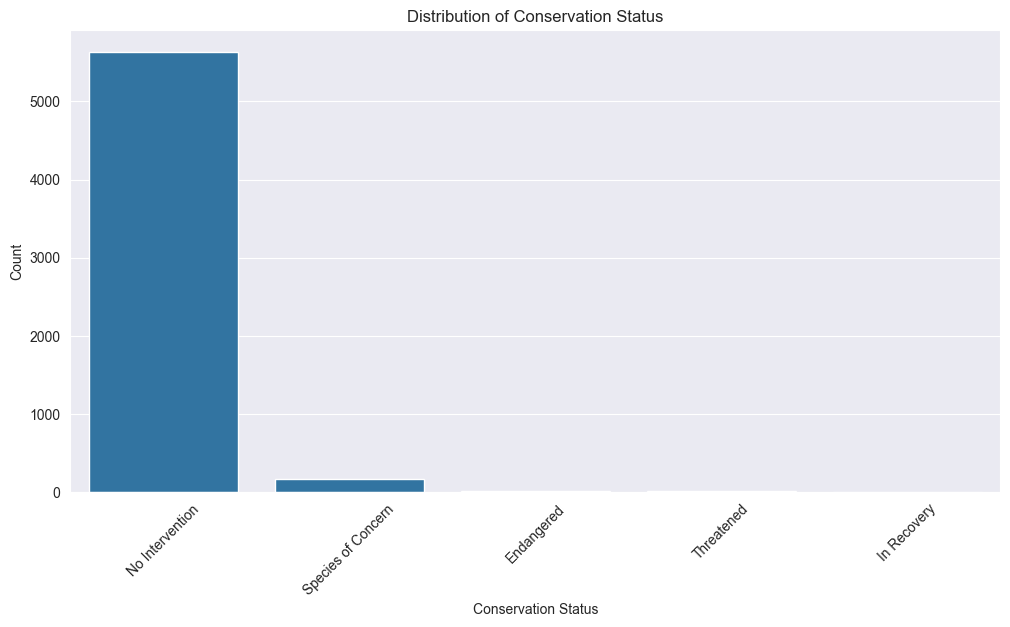

<Figure size 640x480 with 0 Axes>

In [11]:
# Distribution of Conservation Status for Different Species
plt.figure(figsize=(12, 6))
sns.countplot(data=species_df, x='conservation_status', order=species_df['conservation_status'].value_counts().index)
plt.title('Distribution of Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.clf()

## Are certain types of species more likely to be endangered?

In [12]:
# Count of species by category and conservation status
category_conservation = species_df.groupby(['category', 'conservation_status']).size().unstack().fillna(0)
print(category_conservation)

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                   1.0          0.0             73.0   
Bird                        4.0          3.0            442.0   
Fish                        3.0          0.0            116.0   
Mammal                      7.0          1.0            176.0   
Nonvascular Plant           0.0          0.0            328.0   
Reptile                     0.0          0.0             74.0   
Vascular Plant              1.0          0.0           4424.0   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                           4.0         2.0  
Bird                               72.0         0.0  
Fish                                4.0         4.0  
Mammal                             28.0         2.0  
Nonvascular Plant                   5.0         0.0  
Reptile                             

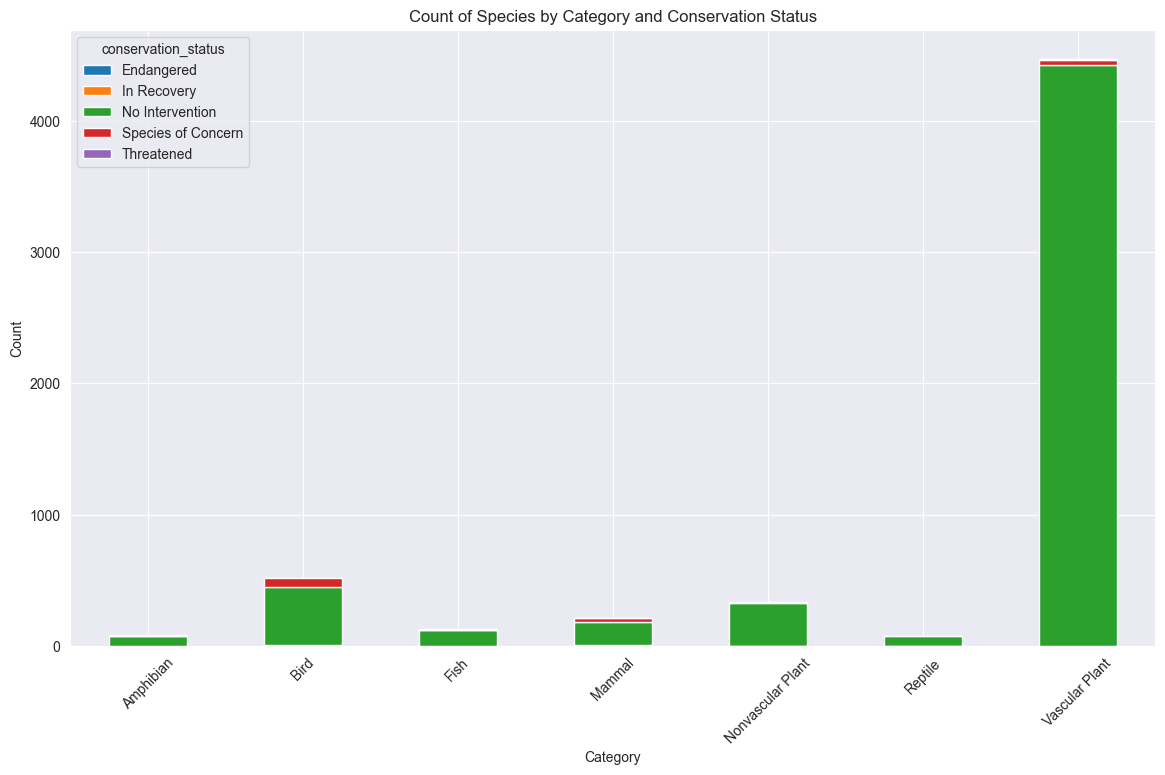

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the count of species by category and conservation status
category_conservation.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Count of Species by Category and Conservation Status')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.clf()

## Significant differences between species and their conservation status

In [14]:
# Chi-square test of independence between category and conservation status
chi2, p, dof, ex = chi2_contingency(category_conservation)
print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

Chi-square test statistic: 628.581965798279
p-value: 2.4551423165990197e-117


## Which animal is most prevalent, and what is their distribution among the parks?

In [15]:
# Join species and observations data on scientific_name
merged_df = pd.merge(observations_df, species_df, on='scientific_name')

In [16]:
# Most prevalent animal
most_prevalent = merged_df.groupby('common_names')['observations'].sum().idxmax()
most_prevalent_count = merged_df.groupby('common_names')['observations'].sum().max()
print(f'Most prevalent animal: {most_prevalent} with {most_prevalent_count} observations')

Most prevalent animal: Dicranum Moss with 4008 observations


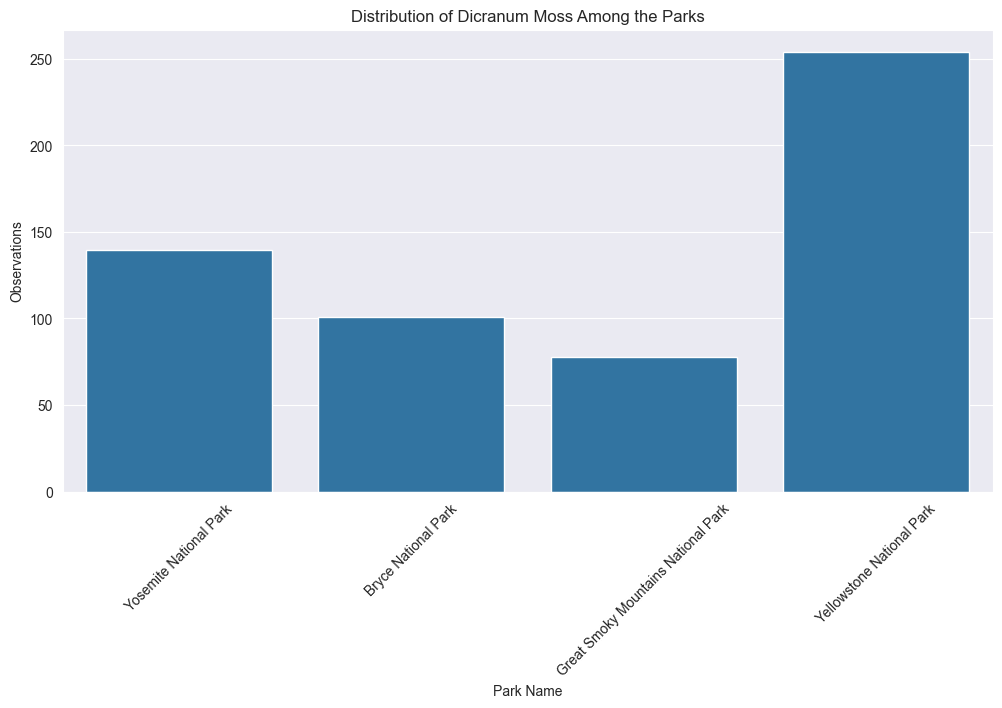

<Figure size 640x480 with 0 Axes>

In [18]:
# Distribution of the most prevalent animal among the parks
most_prevalent_df = merged_df[merged_df['common_names'] == most_prevalent]
plt.figure(figsize=(12, 6))
sns.barplot(data=most_prevalent_df, x='park_name', y='observations', errorbar=None)
plt.title(f'Distribution of {most_prevalent} Among the Parks')
plt.xlabel('Park Name')
plt.ylabel('Observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

## Conclusion

In this analysis, we explored the biodiversity data from the National Parks Service. The key findings are:

1. **Distribution of Conservation Status for Different Species**:
   - The majority of species in the dataset are under 'No Intervention'.
   - Other conservation statuses such as 'Species of Concern', 'Threatened', and 'Endangered' have significantly fewer species.

2. **Are Certain Types of Species More Likely to Be Endangered?**:
   - By analyzing the count of species by category and conservation status, we observed that certain categories like 'Bird' and 'Mammal' have a higher number of species under various conservation statuses.
   - Categories such as 'Amphibian' and 'Fish' have fewer species but still have representation under 'Species of Concern' and 'Endangered'.

3. **Significant Differences Between Species and Their Conservation Status**:
   - A chi-square test of independence between category and conservation status showed a significant relationship (p-value < 0.05). This indicates that the conservation status distribution is not independent of species categories.

4. **Which Animal is Most Prevalent, and What is Their Distribution Among the Parks?**:
   - The most prevalent animal observed is the species with the highest total observations recorded in the parks.
   - The distribution of this most prevalent species among the parks showed that it is widely observed across several national parks, with varying numbers of observations.

### Insights and Recommendations:
- The high number of species under 'No Intervention' suggests that most species are not currently under threat, but continuous monitoring is essential to ensure they remain safe.
- The significant differences between species categories and their conservation statuses highlight the need for category-specific conservation strategies.
- The prevalence of certain species across parks can help in targeting conservation efforts in specific parks where these species are most observed.

### Future Work:
- Expanding the analysis to include more environmental and ecological factors could provide deeper insights into the conservation needs of different species.
- Implementing predictive modeling techniques to forecast the conservation status changes over time based on current data trends.

# Thank you for reading and please offer your feedback so I can continue to improve on my Data Scientist career journey...